<a href="https://colab.research.google.com/github/natoo77/SocialMediaSentiment/blob/main/Social_media_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import kagglehub
import os

# Download latest data version from kaggle
path = kagglehub.dataset_download("kashishparmar02/social-media-sentiments-analysis-dataset")
print("Path to dataset files:", path)

file_path = os.path.join(path, 'sentimentdataset.csv')

data = pd.read_csv(file_path)


100%|██████████| 50.9k/50.9k [00:00<00:00, 1.44MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kashishparmar02/social-media-sentiments-analysis-dataset/versions/3


In [3]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [5]:
data = data.iloc[:,2:]
data.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


`Feature	Description`

*   `Text`	User-generated content showcasing sentiments
*  `Sentiment`	Categorized emotions
*   `Timestamp`	Date and time information
*   `User`	Unique identifiers of users contributing
*   `Platform`	Social media platform where the content originated
*   `Hashtags`	Identifies trending topics and themes
*   `Likes`	Quantifies user engagement (likes)
*  `Retweets`	Reflects content popularity (retweets)
*   `Country`	Geographical origin of each post
*  `Year`	Year of the post
*   `Month`	Month of the post
*   `Day`	Day of the post
*  `Hour`	Hour of the post


In [6]:
# @title EDA

In [7]:
# @title Sentiment column grouping

In [8]:
print(f"Number of unique values of Sentiment column: {data['Sentiment'].nunique()}\n")

print(data['Sentiment'].unique())

Number of unique values of Sentiment column: 279

[' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '
 ' Anxiety    

<Axes: ylabel='count'>

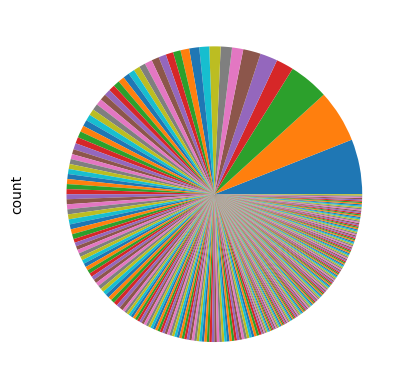

In [9]:
#Rozkład zmiennej sentyment
data['Sentiment'].value_counts().plot(kind='pie', labels=None)

In [10]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon') #Compute sentiment labels


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [11]:
sentiment_unique = data['Sentiment'].unique()
sentiment_values = []
for item in sentiment_unique:
  sentiment_value = SentimentIntensityAnalyzer().polarity_scores(item)
  sentiment_values.append(sentiment_value)


The *SentimentIntensityAnalyzer* produces a dictionary with four key metrics:

**neg**: Proportion of the text classified as negative.

**neu**: Proportion of the text classified as neutral.

**pos**: Proportion of the text classified as positive.

**compound**: A normalized score between -1 (most negative) and +1 (most positive). This is the overall sentiment score.

In [12]:
for i in range(len(sentiment_unique)):
    print(f"{sentiment_unique[i].strip()} -> {sentiment_values[i]}")

Positive -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}
Negative -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}
Neutral -> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Anger -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}
Fear -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4939}
Sadness -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4404}
Disgust -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5994}
Happiness -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}
Joy -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}
Love -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
Amusement -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3612}
Enjoyment -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}
Admiration -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5423}
Affection -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5267}
Awe -> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

We can see that on the words like FestiveJoy
InnerJourney, the nalysis doesnt work well so let's devide these words.
EmotionalStorm -> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
emotional storm -> {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.1531}

In [13]:
import re

def split_compound_words(text):
    # Insert space before each uppercase letter (except the first letter)
    separated_text = re.sub(r'(?<!^)(?=[A-Z])', ' ', text)
    return separated_text.lower()

# Apply the function to the Sentiment column
data['Processed_Sentiment'] = data['Sentiment'].apply(split_compound_words)



In [14]:
sentiment_unique_prc = data['Processed_Sentiment'].unique()
sentiment_values_prc = []
for item in sentiment_unique_prc:
  sentiment_value_prc = SentimentIntensityAnalyzer().polarity_scores(item)
  sentiment_values_prc.append(sentiment_value_prc)

for i in range(len(sentiment_unique_prc)):
    print(f"{sentiment_unique_prc[i].strip()} -> {sentiment_values_prc[i]}")

positive -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}
negative -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}
neutral -> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
anger -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}
fear -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4939}
sadness -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4404}
disgust -> {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5994}
happiness -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}
joy -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}
love -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
amusement -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3612}
enjoyment -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}
admiration -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5423}
affection -> {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5267}
awe -> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

In [15]:
# Define the sentiment grouping function
def sentiment_grouping(score):
    if score >= 0.1:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Initialize an empty dictionary to store grouped words
grouped_words = {'Positive': [], 'Negative': [], 'Neutral': []}

# Iterate over the data and group words
for i in range(len(sentiment_unique_prc)):
    word = sentiment_unique_prc[i].strip()  # Get the word
    score = sentiment_values_prc[i]['compound']  # Get the sentiment score
    category = sentiment_grouping(score)  # Get the sentiment category
    grouped_words[category].append(word)  # Add the word to the appropriate group

# Print the grouped words
print(grouped_words['Positive'])
print(grouped_words['Negative'])
print(grouped_words['Neutral'])

['positive', 'happiness', 'joy', 'love', 'amusement', 'enjoyment', 'admiration', 'affection', 'surprise', 'acceptance', 'adoration', 'anticipation', 'calmness', 'excitement', 'kind', 'pride', 'excitement', 'elation', 'euphoria', 'contentment', 'gratitude', 'hope', 'compassion', 'tenderness', 'enthusiasm', 'compassion', 'elation', 'acceptance', 'determination', 'contentment', 'hopeful', 'proud', 'grateful', 'empathetic', 'compassionate', 'playful', 'inspired', 'confident', 'yearning', 'determination', 'thrill', 'calmness', 'gratitude', 'admiration', 'overjoyed', 'inspiration', 'motivation', 'amusement', 'joyful reunion', 'excitement', 'satisfaction', 'blessed', 'anticipation', 'appreciation', 'confidence', 'surprise', 'optimism', 'pride', 'happiness', 'playful joy', 'dream chaser', 'elegance', 'thrill', 'harmony', 'creativity', 'radiance', 'inspiration', 'coziness', 'gratitude', 'adventure', 'euphoria', 'festive joy', 'freedom', 'harmony', 'radiance', 'inspiration', 'euphoria', 'spark',

In [16]:
# Define a function to find the category of a word
def find_category(word):
    for category, words in grouped_words.items():
        if word in words:  # Check if the word is in the list
            return category
    return 'Unknown'  # Default if the word is not in any category

# Apply the function to the DataFrame
data['Sentiment_category'] = data['Processed_Sentiment'].str.strip().apply(find_category)

# Print the resulting DataFrame
data

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Processed_Sentiment,Sentiment_category
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,positive,Positive
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,negative,Negative
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,positive,Positive
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,positive,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,neutral,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18,happy,Positive
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14,happy,Positive
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17,happy,Positive
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20,happy,Positive


<Axes: ylabel='count'>

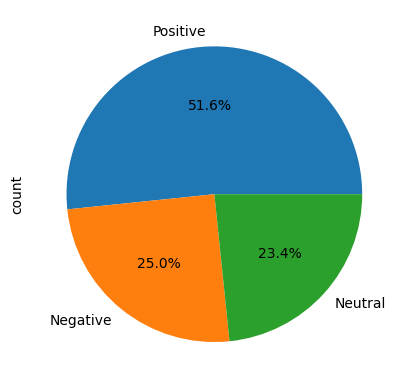

In [17]:
#Rozkład zmiennej sentyment
data['Sentiment_category'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [18]:
# @title Text column cleaning

In [19]:

from nltk import tokenize
# from nltk.tokenize import sent_tokenize
# from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
# from collections import Counter
# from wordcloud import WordCloud


import string
import re

In [20]:
max(data["Text"].str.len())

157

In [21]:
text_list = data["Text"].to_list()
text_list[:10]

[' Enjoying a beautiful day at the park!              ',
 ' Traffic was terrible this morning.                 ',
 ' Just finished an amazing workout! 💪               ',
 ' Excited about the upcoming weekend getaway!        ',
 ' Trying out a new recipe for dinner tonight.        ',
 ' Feeling grateful for the little things in life.    ',
 ' Rainy days call for cozy blankets and hot cocoa.   ',
 ' The new movie release is a must-watch!             ',
 ' Political discussions heating up on the timeline.  ',
 ' Missing summer vibes and beach days.               ']

In [22]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # For word_tokenize
nltk.download('stopwords')  # For stop words
stop_words = set(stopwords.words('english'))  # Load stop words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
def clean_text(text):
    #Convert Text to Lowercase
    text = str(text).lower()
    # Remove dots and comas
    text = re.sub("[,\.\!\:]", '', text)
    # Remove Extra Spaces
    text = " ".join(text.split())
    #Tokenize the Text
    tokens = word_tokenize(text)

    cleaned_tokens = [token for token in tokens if token.lower() not in stop_words]

    cleaned_text = ' '.join(cleaned_tokens)

    return cleaned_text

data["Clean_Text"] = data["Text"].apply(clean_text)

In [24]:
clean_text_list = data["Clean_Text"].to_list()
clean_text_list[:10]

['enjoying beautiful day park',
 'traffic terrible morning',
 'finished amazing workout 💪',
 'excited upcoming weekend getaway',
 'trying new recipe dinner tonight',
 'feeling grateful little things life',
 'rainy days call cozy blankets hot cocoa',
 'new movie release must-watch',
 'political discussions heating timeline',
 'missing summer vibes beach days']

In [25]:
# Display a sample of the cleaned data
data[['Text', 'Clean_Text']].head()

,Text,Clean_Text
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finished amazing workout 💪
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight


In [26]:
data['Correctly_Tokenized_Text'] = data['Clean_Text'].apply(word_tokenize)
data[['Text', 'Correctly_Tokenized_Text']].head()

,Text,Correctly_Tokenized_Text
0,Enjoying a beautiful day at the park! ...,"[enjoying, beautiful, day, park]"
1,Traffic was terrible this morning. ...,"[traffic, terrible, morning]"
2,Just finished an amazing workout! 💪 ...,"[finished, amazing, workout, 💪]"
3,Excited about the upcoming weekend getaway! ...,"[excited, upcoming, weekend, getaway]"
4,Trying out a new recipe for dinner tonight. ...,"[trying, new, recipe, dinner, tonight]"


In [27]:
# @title  INFO

In [28]:
"""
Once you have tokenized your text, the next steps for sentiment analysis depend on the type of approach you're using. Below is a detailed guide for processing tokenized text for sentiment analysis:

1. Feature Extraction
After tokenization, the raw tokens need to be transformed into numerical features for a sentiment analysis model.

a) Bag of Words (BoW) or Count Vectorization
Converts tokens into a sparse matrix of word counts.

b) TF-IDF (Term Frequency-Inverse Document Frequency)
Adds weight to words based on importance in the document.

c) Word Embeddings
Use word embeddings like Word2Vec, GloVe, or FastText to convert tokens into dense vectors.

d) Pre-trained Transformer Models
Use transformers like BERT, RoBERTa, or DistilBERT to get contextual embeddings.

2. Apply Sentiment Analysis Techniques

Approach 1: Rule-based Sentiment Analysis
If you prefer a rule-based approach, you can calculate sentiment using lexicons like:

VADER: Suitable for short texts, social media posts, etc.
TextBlob: Provides polarity and subjectivity scores.

Approach 2: Supervised Learning
If you have labeled data (e.g., positive/negative sentiment), train a model:

Preprocess Data:
Tokenize, remove stop words, and convert to numerical features using one of the methods above.
Train a Classifier: Example with Logistic Regression:


Approach 3: Deep Learning
Use embeddings or token sequences for deep learning models:

LSTM/GRU: Sequential models for text data.
Transformer Models: Fine-tune BERT, RoBERTa, etc.
Example with LSTM:
python

3. Evaluate Sentiment
Regardless of the method, evaluate your sentiment analysis model on metrics like:

Accuracy: Correct predictions / total predictions.
Precision: Focuses on correctly predicted positive examples.
Recall: Measures the ability to capture all positive examples.
F1-Score: Harmonic mean of precision and recall.
Example with Scikit-learn:

4. Visualize Results
Visualizing sentiment trends or results can provide insights:

Word Clouds for Positive/Negative Words
Sentiment Distribution:

Next Steps
Decide whether you want to use a rule-based or ML/DL-based approach.
Preprocess your data properly.
Choose a model that suits your dataset size and complexity.
Train and evaluate the model on labeled data.
"""

"\nOnce you have tokenized your text, the next steps for sentiment analysis depend on the type of approach you're using. Below is a detailed guide for processing tokenized text for sentiment analysis:\n\n1. Feature Extraction\nAfter tokenization, the raw tokens need to be transformed into numerical features for a sentiment analysis model.\n\na) Bag of Words (BoW) or Count Vectorization\nConverts tokens into a sparse matrix of word counts.\n\nb) TF-IDF (Term Frequency-Inverse Document Frequency)\nAdds weight to words based on importance in the document.\n\nc) Word Embeddings\nUse word embeddings like Word2Vec, GloVe, or FastText to convert tokens into dense vectors.\n\nd) Pre-trained Transformer Models\nUse transformers like BERT, RoBERTa, or DistilBERT to get contextual embeddings.\n\n2. Apply Sentiment Analysis Techniques\n\nApproach 1: Rule-based Sentiment Analysis\nIf you prefer a rule-based approach, you can calculate sentiment using lexicons like:\n\nVADER: Suitable for short text

In [29]:
# @title Approach 1: Vader Sentiment analysis on text

In [30]:
text_sentiment_values =[]
for item in data['Clean_Text']:
  text_sentiment_value = SentimentIntensityAnalyzer().polarity_scores(item)
  text_sentiment_values.append(text_sentiment_value)

In [31]:
for i in range(len(text_sentiment_values)):
    print(f"{data['Clean_Text'][i].strip()} -> {text_sentiment_values[i]}")

enjoying beautiful day park -> {'neg': 0.0, 'neu': 0.215, 'pos': 0.785, 'compound': 0.8074}
traffic terrible morning -> {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}
finished amazing workout 💪 -> {'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.5859}
excited upcoming weekend getaway -> {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.34}
trying new recipe dinner tonight -> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
feeling grateful little things life -> {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.5423}
rainy days call cozy blankets hot cocoa -> {'neg': 0.178, 'neu': 0.822, 'pos': 0.0, 'compound': -0.0772}
new movie release must-watch -> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
political discussions heating timeline -> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
missing summer vibes beach days -> {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.296}
published new blog post check -> {'neg': 0.0, 'neu': 1.0, 'pos'

In [32]:
# # Define the sentiment grouping function
# def sentiment_grouping(score):
#     if score >= 0.1:
#         return 'Positive'
#     elif score <= -0.05:
#         return 'Negative'
#     else:
#         return 'Neutral'

# # Initialize an empty dictionary to store grouped words
grouped_text = {'Positive': [], 'Negative': [], 'Neutral': []}
y_pred_category = []

# Iterate over the data and group words
for i in range(len(data['Clean_Text'])):
    text = data['Clean_Text'][i]  # Get the text
    score = text_sentiment_values[i]['compound']  # Get the sentiment score
    category = sentiment_grouping(score)  # Get the sentiment category
    y_pred_category.append(category)
    grouped_text[category].append(text)  # Add the word to the appropriate group

# Print the grouped words
print(grouped_text['Positive'])
print(grouped_text['Negative'])
print(grouped_text['Neutral'])

['enjoying beautiful day park', 'finished amazing workout 💪', 'excited upcoming weekend getaway', 'feeling grateful little things life', 'feeling bit weather today', 'new year new fitness goals 💪', 'adopted cute furry friend 🐾', 'late-night gaming session friends', 'sipping coffee enjoying good book', 'finished challenging workout routine', 'celebrating milestone work 🎉', 'sunday brunch friends', 'learning new language personal growth', 'quiet evening good book', 'reflecting importance mental health', 'new painting progress 🎨', 'enjoying cup tea watching sunset', 'coding new project enthusiasm', 'feeling inspired attending workshop', 'excited upcoming gaming tournament', "celebrating friend 's birthday tonight 🎂", 'feeling accomplished productive day', 'cozy evening good movie', 'new book release favorite author', 'reflecting beauty nature', 'cooking special dinner loved ones', 'feeling optimistic week ahead', 'starting new fitness challenge tomorrow 💪', "ca n't believe injustice happe

In [33]:
y_pred_category
y_category = data['Sentiment_category'].tolist()

len(y_pred_category), len(y_category)

(732, 732)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Classification report for bag of words
vader_report=classification_report(y_category,y_pred_category)
print(vader_report)

              precision    recall  f1-score   support

    Negative       0.82      0.84      0.83       183
     Neutral       0.46      0.24      0.32       171
    Positive       0.73      0.88      0.80       378

    accuracy                           0.72       732
   macro avg       0.67      0.65      0.65       732
weighted avg       0.69      0.72      0.69       732



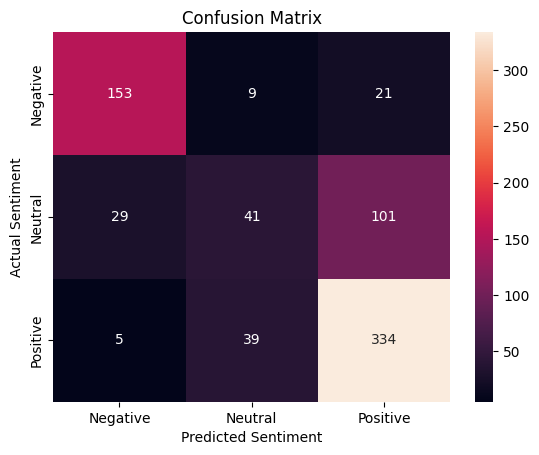

In [35]:
conf_matrix = confusion_matrix(y_category,y_pred_category)
sns.heatmap(conf_matrix, annot=True, xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"],fmt="d", cmap="rocket")
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix')
plt.show()

In [36]:
# @title Approach 2: Supervised Learning: Model Building with BoW and TFIDF, Logistic Regression and SGDClassifier

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import LabelBinarizer
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# from wordcloud import WordCloud,STOPWORDS
# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
# from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
# from textblob import TextBlob
# from textblob import Word

from sklearn.preprocessing import LabelBinarizer

In [38]:
# #labeling the sentient data
# lb=LabelBinarizer()
# #transformed sentiment data
# sentiment_data=lb.fit_transform(data['Sentiment_category'])
# print(sentiment_data)

In [39]:
from sklearn.model_selection import train_test_split
# Create feature vectors

X = np.stack(data['Clean_Text'])
y = data['Sentiment_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [40]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0.0, max_df=1,binary=False,ngram_range=(1,2))
#transformed train reviews
cv_text_train=cv.fit_transform(X_train)
#transformed test reviews
cv_text_test=cv.transform(X_test)

print('BOW_cv_train:',cv_text_train.shape)
print('BOW_cv_test:',cv_text_test.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (512, 4277)
BOW_cv_test: (220, 4277)


In [41]:
bow_df = pd.DataFrame(cv_text_train.toarray(), columns=cv.get_feature_names_out())

# Display the Bag-of-Words DataFrame
bow_df

,ablaze,ablaze forging,abyss despair,academic frustration,academic juggling,acceptance dance,acceptance journey,accepts,accepts award,accidentally liked,...,yet,yet unexplored,york,york city,zen,zen wisdom,zero,zero lazyday,zestful,zestful heart
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0.0,max_df=1,use_idf=True,ngram_range=(1,2))
#transformed train reviews
tv_text_train=tv.fit_transform(X_train)
#transformed test reviews
tv_text_test=tv.transform(X_test)
print('Tfidf_train:',tv_text_train.shape)
print('Tfidf_test:',tv_text_test.shape)

Tfidf_train: (512, 4277)
Tfidf_test: (220, 4277)


In [43]:
tfidf_df = pd.DataFrame(tv_text_train.toarray(), columns=tv.get_feature_names_out())

# Display the Bag-of-Words DataFrame
tfidf_df.head()

,ablaze,ablaze forging,abyss despair,academic frustration,academic juggling,acceptance dance,acceptance journey,accepts,accepts award,accidentally liked,...,yet,yet unexplored,york,york city,zen,zen wisdom,zero,zero lazyday,zestful,zestful heart
0,0.0,0.0,0.0,0.0,0.0,0.0,0.447214,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Let us build logistic regression model for both bag of words and tfidf

#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_text_train,y_train)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_text_train,y_train)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [45]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_text_test)
# print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_text_test)
# print(lr_tfidf_predict)

In [46]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(y_test,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.5636363636363636
lr_tfidf_score : 0.5181818181818182


In [47]:
#Classification report for bag of words
lr_bow_report=classification_report(y_test,lr_bow_predict)
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(y_test,lr_tfidf_predict)
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Negative       0.82      0.15      0.26        59
     Neutral       0.75      0.12      0.21        50
    Positive       0.54      0.98      0.70       111

    accuracy                           0.56       220
   macro avg       0.70      0.42      0.39       220
weighted avg       0.66      0.56      0.47       220

              precision    recall  f1-score   support

    Negative       1.00      0.02      0.03        59
     Neutral       1.00      0.04      0.08        50
    Positive       0.51      1.00      0.68       111

    accuracy                           0.52       220
   macro avg       0.84      0.35      0.26       220
weighted avg       0.75      0.52      0.37       220



In [48]:
# Stochastic gradient descent or Linear support vector machines for bag of words and tfidf features
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_text_train,y_train)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_text_train,y_train)
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


In [49]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_text_test)

#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_text_test)

In [50]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(y_test,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)

#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(y_test,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.6181818181818182
svm_tfidf_score : 0.5772727272727273


In [51]:
#Classification report for bag of words
svm_bow_report=classification_report(y_test,svm_bow_predict)
print(svm_bow_report)

#Classification report for tfidf features
svm_tfidf_report=classification_report(y_test,svm_tfidf_predict)
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Negative       0.79      0.37      0.51        59
     Neutral       0.56      0.20      0.29        50
    Positive       0.60      0.94      0.73       111

    accuracy                           0.62       220
   macro avg       0.65      0.50      0.51       220
weighted avg       0.64      0.62      0.57       220

              precision    recall  f1-score   support

    Negative       0.87      0.22      0.35        59
     Neutral       0.64      0.14      0.23        50
    Positive       0.55      0.96      0.70       111

    accuracy                           0.58       220
   macro avg       0.68      0.44      0.43       220
weighted avg       0.66      0.58      0.50       220



In [52]:
from sklearn.linear_model import PassiveAggressiveClassifier

#training the linear svm
pac = PassiveAggressiveClassifier(max_iter=500, random_state=42)
#fitting the svm for bag of words
pac_bow=pac.fit(cv_text_train, y_train)

#fitting the svm for tfidf features
pac_tfidf=pac.fit(tv_text_train,y_train)

In [53]:
#Predicting the model for bag of words
pac_bow_predict=pac.predict(cv_text_test)

#Predicting the model for tfidf features
pac_tfidf_predict=pac.predict(tv_text_test)

In [54]:
#Accuracy score for bag of words
pac_bow_score=accuracy_score(y_test,pac_bow_predict)
print("pac_bow_score :", pac_bow_score)

#Accuracy score for tfidf features
pac_tfidf_score=accuracy_score(y_test,pac_tfidf_predict)
print("pac_tfidf_score :", pac_tfidf_score)

pac_bow_score : 0.6681818181818182
pac_tfidf_score : 0.6636363636363637


In [55]:
#Classification report for bag of words
pac_bow_report=classification_report(y_test,pac_bow_predict)
print(pac_bow_report)

#Classification report for tfidf features
pac_tfidf_report=classification_report(y_test,pac_tfidf_predict)
print(pac_tfidf_report)

              precision    recall  f1-score   support

    Negative       0.70      0.64      0.67        59
     Neutral       0.53      0.40      0.45        50
    Positive       0.70      0.80      0.74       111

    accuracy                           0.67       220
   macro avg       0.64      0.62      0.62       220
weighted avg       0.66      0.67      0.66       220

              precision    recall  f1-score   support

    Negative       0.69      0.61      0.65        59
     Neutral       0.56      0.36      0.44        50
    Positive       0.68      0.83      0.74       111

    accuracy                           0.66       220
   macro avg       0.64      0.60      0.61       220
weighted avg       0.65      0.66      0.65       220



In [56]:
# @title Approach 3: Deep Learning ith PyTOrch

In [57]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import BertTokenizer

In [58]:
data_sentiment=data[['Clean_Text','Sentiment_category']]
data_sentiment.head()

,Clean_Text,Sentiment_category
0,enjoying beautiful day park,Positive
1,traffic terrible morning,Negative
2,finished amazing workout 💪,Positive
3,excited upcoming weekend getaway,Positive
4,trying new recipe dinner tonight,Neutral


In [59]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer

# Step 1: Map sentiment categories to numeric labels
label_mapping = {"Positive": 1, "Negative": 0, "Neutral": 2}
data_sentiment['Sentiment_label'] = data_sentiment['Sentiment_category'].map(label_mapping)

# Step 2: Custom Dataset for PyTorch
class SentimentDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length=128):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Extract text and label
        text = self.data.iloc[idx]['Clean_Text']
        label = self.data.iloc[idx]['Sentiment_label']

        # Tokenize text
        encoded = self.tokenizer(
            text,
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt"
        )

        return {
            "input_ids": encoded["input_ids"].squeeze(0),  # Remove batch dimension
            "attention_mask": encoded["attention_mask"].squeeze(0),
            "label": torch.tensor(label, dtype=torch.long)
        }

# Step 3: Initialize Tokenizer (e.g., BERT)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Step 4: Train-Test Split
train_data, test_data = train_test_split(data_sentiment, test_size=0.2, random_state=42)

# Step 5: Create PyTorch Datasets
train_dataset = SentimentDataset(train_data, tokenizer)
test_dataset = SentimentDataset(test_data, tokenizer)

# Step 6: DataLoaders
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

# Example: Inspect one batch
for batch in train_loader:
    print(batch)
    break

<ipython-input-59-ba8e5e77d78d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment['Sentiment_label'] = data_sentiment['Sentiment_category'].map(label_mapping)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

{'input_ids': tensor([[  101,  3377,  2136,  2716,  7327,  8458, 11069,  2103,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,  

In [60]:
import torch.nn as nn
from transformers import BertModel

# Define Sentiment Classifier
class SentimentClassifier(nn.Module):
    def __init__(self, num_classes):
        super(SentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output  # [CLS] token representation
        return self.classifier(pooled_output)


In [61]:
# Initialize model, optimizer, and loss function
model = SentimentClassifier(num_classes=3)  # Positive, Negative, Neutral

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [65]:
from tqdm import tqdm

optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()
model.train()  # Enable training mode
num_epochs=3

for epoch in range(num_epochs):  # Train for 3 epochs
    model.train()  # Enable training mode
    total_loss = 0  # To track total loss for this epoch

    # Using tqdm to show a progress bar
    for step, batch in tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1}/{num_epochs}"):
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["label"]

        optimizer.zero_grad()  # Reset gradients
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()  # Backpropagate the loss
        optimizer.step()  # Update the model parameters

        total_loss += loss.item()

        # Optionally print the loss every 10 steps
        if step % 10 == 0:
            print(f"Step {step}/{len(train_loader)}: Loss = {loss.item():.4f}")

    # Print total loss for the epoch
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1} completed. Average Loss: {avg_loss:.4f}")



Epoch 1/3:   0%|          | 1/293 [00:02<11:45,  2.41s/it]

Step 0/293: Loss = 0.2388


Epoch 1/3:   4%|▍         | 11/293 [00:25<10:36,  2.26s/it]

Step 10/293: Loss = 0.4064


Epoch 1/3:   7%|▋         | 21/293 [00:48<10:39,  2.35s/it]

Step 20/293: Loss = 1.2401


Epoch 1/3:  11%|█         | 31/293 [01:10<09:29,  2.17s/it]

Step 30/293: Loss = 0.2789


Epoch 1/3:  14%|█▍        | 41/293 [01:34<10:28,  2.49s/it]

Step 40/293: Loss = 0.6678


Epoch 1/3:  17%|█▋        | 51/293 [01:55<08:35,  2.13s/it]

Step 50/293: Loss = 0.7751


Epoch 1/3:  21%|██        | 61/293 [02:24<10:08,  2.62s/it]

Step 60/293: Loss = 0.5958


Epoch 1/3:  24%|██▍       | 71/293 [02:46<08:27,  2.29s/it]

Step 70/293: Loss = 0.4353


Epoch 1/3:  28%|██▊       | 81/293 [03:08<07:23,  2.09s/it]

Step 80/293: Loss = 0.1577


Epoch 1/3:  31%|███       | 91/293 [03:31<07:35,  2.25s/it]

Step 90/293: Loss = 0.2501


Epoch 1/3:  34%|███▍      | 101/293 [03:55<08:01,  2.51s/it]

Step 100/293: Loss = 0.2384


Epoch 1/3:  38%|███▊      | 111/293 [04:18<06:36,  2.18s/it]

Step 110/293: Loss = 0.2044


Epoch 1/3:  41%|████▏     | 121/293 [04:40<06:33,  2.29s/it]

Step 120/293: Loss = 0.1346


Epoch 1/3:  45%|████▍     | 131/293 [05:02<05:49,  2.16s/it]

Step 130/293: Loss = 0.1935


Epoch 1/3:  48%|████▊     | 141/293 [05:26<05:39,  2.23s/it]

Step 140/293: Loss = 0.6767


Epoch 1/3:  52%|█████▏    | 151/293 [05:49<05:38,  2.38s/it]

Step 150/293: Loss = 0.6013


Epoch 1/3:  55%|█████▍    | 161/293 [06:11<04:46,  2.17s/it]

Step 160/293: Loss = 0.6002


Epoch 1/3:  58%|█████▊    | 171/293 [06:34<04:56,  2.43s/it]

Step 170/293: Loss = 0.1299


Epoch 1/3:  62%|██████▏   | 181/293 [06:56<04:00,  2.15s/it]

Step 180/293: Loss = 0.2891


Epoch 1/3:  65%|██████▌   | 191/293 [07:19<03:58,  2.34s/it]

Step 190/293: Loss = 0.7077


Epoch 1/3:  69%|██████▊   | 201/293 [07:41<03:13,  2.11s/it]

Step 200/293: Loss = 0.6719


Epoch 1/3:  72%|███████▏  | 211/293 [08:05<03:05,  2.26s/it]

Step 210/293: Loss = 2.0453


Epoch 1/3:  75%|███████▌  | 221/293 [08:27<02:45,  2.29s/it]

Step 220/293: Loss = 0.1926


Epoch 1/3:  79%|███████▉  | 231/293 [08:49<02:16,  2.20s/it]

Step 230/293: Loss = 0.1193


Epoch 1/3:  82%|████████▏ | 241/293 [09:12<02:05,  2.41s/it]

Step 240/293: Loss = 0.2554


Epoch 1/3:  86%|████████▌ | 251/293 [09:34<01:30,  2.15s/it]

Step 250/293: Loss = 0.1353


Epoch 1/3:  89%|████████▉ | 261/293 [09:57<01:16,  2.39s/it]

Step 260/293: Loss = 0.3261


Epoch 1/3:  92%|█████████▏| 271/293 [10:19<00:45,  2.08s/it]

Step 270/293: Loss = 0.4612


Epoch 1/3:  96%|█████████▌| 281/293 [10:41<00:26,  2.23s/it]

Step 280/293: Loss = 0.0961


Epoch 1/3:  99%|█████████▉| 291/293 [11:02<00:04,  2.04s/it]

Step 290/293: Loss = 2.2246


Epoch 1/3: 100%|██████████| 293/293 [11:06<00:00,  2.28s/it]


Epoch 1 completed. Average Loss: 0.5795


Epoch 2/3:   0%|          | 1/293 [00:02<09:49,  2.02s/it]

Step 0/293: Loss = 0.3304


Epoch 2/3:   4%|▍         | 11/293 [00:23<09:36,  2.04s/it]

Step 10/293: Loss = 0.1350


Epoch 2/3:   7%|▋         | 21/293 [00:45<10:04,  2.22s/it]

Step 20/293: Loss = 0.4254


Epoch 2/3:  11%|█         | 31/293 [01:06<08:56,  2.05s/it]

Step 30/293: Loss = 0.3200


Epoch 2/3:  14%|█▍        | 41/293 [01:28<08:59,  2.14s/it]

Step 40/293: Loss = 0.0446


Epoch 2/3:  17%|█▋        | 51/293 [01:49<08:20,  2.07s/it]

Step 50/293: Loss = 0.5451


Epoch 2/3:  21%|██        | 61/293 [02:12<08:28,  2.19s/it]

Step 60/293: Loss = 0.0929


Epoch 2/3:  24%|██▍       | 71/293 [02:34<08:16,  2.24s/it]

Step 70/293: Loss = 1.1157


Epoch 2/3:  28%|██▊       | 81/293 [02:55<07:30,  2.13s/it]

Step 80/293: Loss = 0.0468


Epoch 2/3:  31%|███       | 91/293 [03:17<07:38,  2.27s/it]

Step 90/293: Loss = 0.0880


Epoch 2/3:  34%|███▍      | 101/293 [03:40<06:57,  2.17s/it]

Step 100/293: Loss = 0.0521


Epoch 2/3:  38%|███▊      | 111/293 [04:02<07:09,  2.36s/it]

Step 110/293: Loss = 0.0302


Epoch 2/3:  41%|████▏     | 121/293 [04:24<06:02,  2.11s/it]

Step 120/293: Loss = 0.0208


Epoch 2/3:  45%|████▍     | 131/293 [04:46<06:32,  2.42s/it]

Step 130/293: Loss = 0.4340


Epoch 2/3:  48%|████▊     | 141/293 [05:08<05:17,  2.09s/it]

Step 140/293: Loss = 0.2719


Epoch 2/3:  52%|█████▏    | 151/293 [05:30<05:35,  2.36s/it]

Step 150/293: Loss = 0.2507


Epoch 2/3:  55%|█████▍    | 161/293 [05:52<04:34,  2.08s/it]

Step 160/293: Loss = 0.1058


Epoch 2/3:  58%|█████▊    | 171/293 [06:14<04:33,  2.24s/it]

Step 170/293: Loss = 0.5498


Epoch 2/3:  62%|██████▏   | 181/293 [06:35<03:51,  2.07s/it]

Step 180/293: Loss = 0.3300


Epoch 2/3:  65%|██████▌   | 191/293 [06:58<03:53,  2.29s/it]

Step 190/293: Loss = 0.2839


Epoch 2/3:  69%|██████▊   | 201/293 [07:19<03:11,  2.08s/it]

Step 200/293: Loss = 0.0628


Epoch 2/3:  72%|███████▏  | 211/293 [07:41<02:59,  2.19s/it]

Step 210/293: Loss = 1.2770


Epoch 2/3:  75%|███████▌  | 221/293 [08:03<02:32,  2.11s/it]

Step 220/293: Loss = 0.0666


Epoch 2/3:  79%|███████▉  | 231/293 [08:25<02:13,  2.16s/it]

Step 230/293: Loss = 0.1647


Epoch 2/3:  82%|████████▏ | 241/293 [08:47<01:58,  2.28s/it]

Step 240/293: Loss = 0.3821


Epoch 2/3:  86%|████████▌ | 251/293 [09:09<01:30,  2.16s/it]

Step 250/293: Loss = 0.2989


Epoch 2/3:  89%|████████▉ | 261/293 [09:32<01:16,  2.40s/it]

Step 260/293: Loss = 0.1658


Epoch 2/3:  92%|█████████▏| 271/293 [09:54<00:47,  2.16s/it]

Step 270/293: Loss = 0.0422


Epoch 2/3:  96%|█████████▌| 281/293 [10:17<00:29,  2.44s/it]

Step 280/293: Loss = 1.6737


Epoch 2/3:  99%|█████████▉| 291/293 [10:38<00:04,  2.12s/it]

Step 290/293: Loss = 0.0400


Epoch 2/3: 100%|██████████| 293/293 [10:42<00:00,  2.19s/it]


Epoch 2 completed. Average Loss: 0.3559


Epoch 3/3:   0%|          | 1/293 [00:02<14:24,  2.96s/it]

Step 0/293: Loss = 0.0844


Epoch 3/3:   4%|▍         | 11/293 [00:24<10:01,  2.13s/it]

Step 10/293: Loss = 0.3645


Epoch 3/3:   7%|▋         | 21/293 [00:47<10:45,  2.37s/it]

Step 20/293: Loss = 0.1150


Epoch 3/3:  11%|█         | 31/293 [01:08<09:07,  2.09s/it]

Step 30/293: Loss = 0.0822


Epoch 3/3:  14%|█▍        | 41/293 [01:31<09:39,  2.30s/it]

Step 40/293: Loss = 0.0159


Epoch 3/3:  17%|█▋        | 51/293 [01:52<08:28,  2.10s/it]

Step 50/293: Loss = 0.0304


Epoch 3/3:  21%|██        | 61/293 [02:15<08:57,  2.31s/it]

Step 60/293: Loss = 0.0097


Epoch 3/3:  24%|██▍       | 71/293 [02:37<07:41,  2.08s/it]

Step 70/293: Loss = 0.0216


Epoch 3/3:  28%|██▊       | 81/293 [02:59<07:39,  2.17s/it]

Step 80/293: Loss = 0.0290


Epoch 3/3:  31%|███       | 91/293 [03:21<07:06,  2.11s/it]

Step 90/293: Loss = 0.0072


Epoch 3/3:  34%|███▍      | 101/293 [03:43<07:00,  2.19s/it]

Step 100/293: Loss = 0.2869


Epoch 3/3:  38%|███▊      | 111/293 [04:06<06:54,  2.28s/it]

Step 110/293: Loss = 2.2901


Epoch 3/3:  41%|████▏     | 121/293 [04:28<06:17,  2.20s/it]

Step 120/293: Loss = 0.1166


Epoch 3/3:  45%|████▍     | 131/293 [04:51<06:26,  2.39s/it]

Step 130/293: Loss = 0.0243


Epoch 3/3:  48%|████▊     | 141/293 [05:12<05:26,  2.15s/it]

Step 140/293: Loss = 0.0312


Epoch 3/3:  52%|█████▏    | 151/293 [05:36<05:46,  2.44s/it]

Step 150/293: Loss = 0.1232


Epoch 3/3:  55%|█████▍    | 161/293 [05:57<04:45,  2.16s/it]

Step 160/293: Loss = 0.0119


Epoch 3/3:  58%|█████▊    | 171/293 [06:20<04:40,  2.30s/it]

Step 170/293: Loss = 0.0358


Epoch 3/3:  62%|██████▏   | 181/293 [06:42<03:51,  2.06s/it]

Step 180/293: Loss = 0.0914


Epoch 3/3:  65%|██████▌   | 191/293 [07:04<03:45,  2.21s/it]

Step 190/293: Loss = 0.7395


Epoch 3/3:  69%|██████▊   | 201/293 [07:26<03:15,  2.12s/it]

Step 200/293: Loss = 0.1319


Epoch 3/3:  72%|███████▏  | 211/293 [07:49<03:02,  2.23s/it]

Step 210/293: Loss = 0.3675


Epoch 3/3:  75%|███████▌  | 221/293 [08:11<02:39,  2.21s/it]

Step 220/293: Loss = 0.6787


Epoch 3/3:  79%|███████▉  | 231/293 [08:33<02:12,  2.13s/it]

Step 230/293: Loss = 0.0117


Epoch 3/3:  82%|████████▏ | 241/293 [08:55<02:03,  2.37s/it]

Step 240/293: Loss = 0.0251


Epoch 3/3:  86%|████████▌ | 251/293 [09:17<01:30,  2.16s/it]

Step 250/293: Loss = 0.0155


Epoch 3/3:  89%|████████▉ | 261/293 [09:40<01:17,  2.41s/it]

Step 260/293: Loss = 0.6314


Epoch 3/3:  92%|█████████▏| 271/293 [10:02<00:46,  2.12s/it]

Step 270/293: Loss = 0.4345


Epoch 3/3:  96%|█████████▌| 281/293 [10:24<00:27,  2.28s/it]

Step 280/293: Loss = 0.0310


Epoch 3/3:  99%|█████████▉| 291/293 [10:46<00:04,  2.10s/it]

Step 290/293: Loss = 0.7808


Epoch 3/3: 100%|██████████| 293/293 [10:50<00:00,  2.22s/it]

Epoch 3 completed. Average Loss: 0.1692


In [66]:
model.eval()  # Enable evaluation mode
true_labels = []
predicted_labels = []

with torch.no_grad():  # Disable gradient computation
    for batch in test_loader:
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        labels = batch["label"]

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs, dim=1)

        true_labels.extend(labels.tolist())
        predicted_labels.extend(predictions.tolist())

print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.85      0.82      0.83        67
           2       0.66      0.66      0.66        38

    accuracy                           0.80       147
   macro avg       0.79      0.79      0.79       147
weighted avg       0.80      0.80      0.80       147

